In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
scores_df = pd.read_csv("data-files/ch2_scores_em.csv")
scores_df.head(3)
scores_df.set_index('student number', inplace=True) # 일반 컬럼을 인덱스로 변환
scores_df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
print( scores_df.mean() )
print("-" * 50)
print( scores_df['english'].mean() )
print("-" * 50)
print( scores_df.values.mean(axis=0) ) # numpy array로 변환한 후 평균 계산
print("-" * 50)
print( np.mean(scores_df.values, axis=0) )

print( scores_df.median() )
print("-" * 50)
print( scores_df['english'].median() )
# print("-" * 50)
# print( scores_df.values.median(axis=0) ) # numpy array로 변환한 후 평균 계산
print("-" * 50)
print( np.median(scores_df.values, axis=0) )

english        58.38
mathematics    78.88
dtype: float64
--------------------------------------------------
58.38
--------------------------------------------------
[58.38 78.88]
--------------------------------------------------
[58.38 78.88]
english        57.5
mathematics    80.0
dtype: float64
--------------------------------------------------
57.5
--------------------------------------------------
--------------------------------------------------
[57.5 80. ]


In [27]:
print( scores_df.var(ddof=0) ) # ddof = 1이 기본값
print("-" * 50)
print( scores_df.values.var(axis=0, ddof=0) ) # ddof = 0이 기본값
print("-" * 50)

print( scores_df.std(ddof=0) ) # ddof = 0이 기본값
print("-" * 50)
print( scores_df.values.std(axis=0, ddof=0) ) # ddof = 0이 기본값
print("-" * 50)

english        94.1156
mathematics    69.3856
dtype: float64
--------------------------------------------------
[94.1156 69.3856]
--------------------------------------------------
english        9.701319
mathematics    8.329802
dtype: float64
--------------------------------------------------
[9.7013195  8.32980192]
--------------------------------------------------


In [34]:
print( np.percentile(scores_df.values, [0, 25, 50, 75, 100], axis=0) )
print("-" * 50)
scores_df.describe()

[[37.  57. ]
 [54.  76. ]
 [57.5 80. ]
 [65.  84. ]
 [79.  94. ]]
--------------------------------------------------


,english,mathematics
count,50.000000,50.000000
mean,58.380000,78.880000
std,9.799813,8.414371
min,37.000000,57.000000
25%,54.000000,76.000000
50%,57.500000,80.000000
75%,65.000000,84.000000
max,79.000000,94.000000


In [35]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler() # 평균 0, 표준편차 1의 분포의 데이터로 변경
scaled_scores_df = sscaler.fit_transform(scores_df)

In [39]:
print( scores_df.min() )
print( scores_df.max() )
print( scaled_scores_df.mean() )
print( scaled_scores_df.std() )

english        37
mathematics    57
dtype: int64
english        79
mathematics    94
dtype: int64
1.532107773982716e-16
1.0


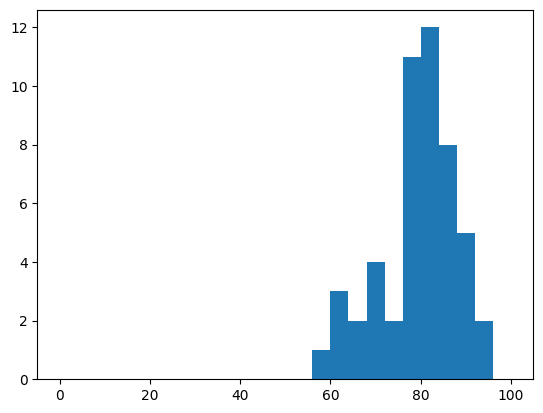

In [43]:
plt.hist( scores_df['mathematics'], bins=25, range=(0, 100) )
plt.show()

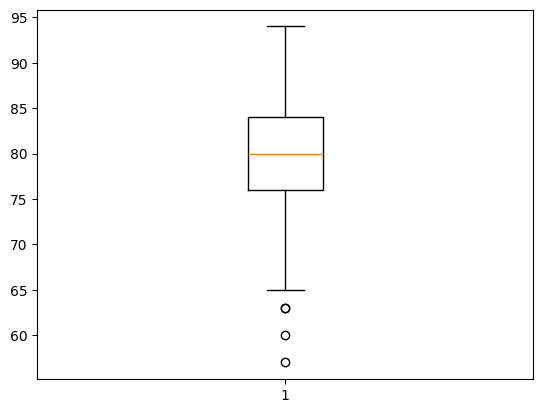

In [44]:
plt.boxplot(scores_df['mathematics'])
plt.show()

In [ ]:
# 상관계수 1
print( np.corrcoef(scores_df['mathematics'], scores_df['english']) )
print("-" * 50)

print( scores_df.corr(method='pearson') )   # 이상치의 영향을 상대적으로 많이 받는 상관계수, 모수 통계 기반
print("-" * 50)
print( scores_df.corr(method='spearman') )  # 이상치의 영향을 상대적으로 적게 받는 상관계수, 비모수 통계 기반
print("-" * 50)
print( scores_df.corr(method='kendall') )   # 이상치의 영향을 상대적으로 적게 받는 상관계수, 비모수 통계 기반, 데이터 수가 적을 때 효과적 (10개 미만)

[[1.         0.72374149]
 [0.72374149 1.        ]]
--------------------------------------------------
              english  mathematics
english      1.000000     0.723741
mathematics  0.723741     1.000000
--------------------------------------------------
              english  mathematics
english      1.000000     0.704585
mathematics  0.704585     1.000000
--------------------------------------------------
              english  mathematics
english      1.000000     0.531316
mathematics  0.531316     1.000000


In [ ]:
# 상관계수 2

from scipy.stats import pearsonr, spearmanr, kendalltau

print( pearsonr(scores_df['mathematics'], scores_df['english']) ) # pvalue는 상관계수의 신뢰도 평가에 참고할 수 있는 값 (보통 0.05 미만이면 신뢰도 높음)
print( spearmanr(scores_df['mathematics'], scores_df['english']) )
print( kendalltau(scores_df['mathematics'], scores_df['english']) )

PearsonRResult(statistic=np.float64(0.7237414863069243), pvalue=np.float64(2.8760870522821537e-09))
SignificanceResult(statistic=np.float64(0.7045853895409744), pvalue=np.float64(1.1269964723609888e-08))
SignificanceResult(statistic=np.float64(0.53131572579566), pvalue=np.float64(1.134129795679461e-07))


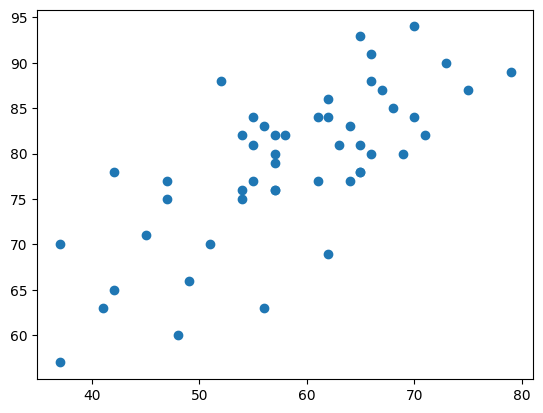

In [50]:
# 2차원 데이터 시각화 (값을 직접 사용)

plt.scatter(scores_df['english'], scores_df['mathematics'])
plt.show()


[ 0.62142302 42.60132433]


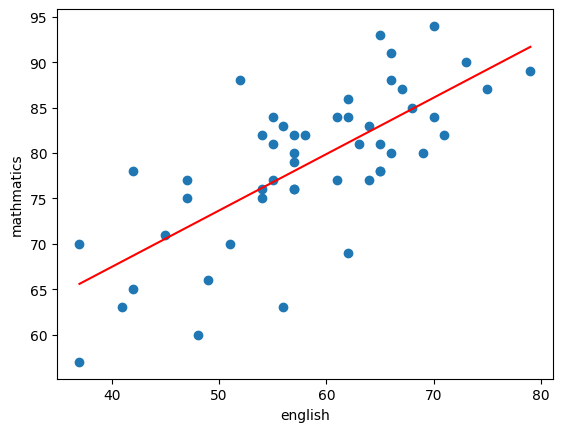

In [55]:
# 두 변수를 가장 잘 설명하는 1차 직선의 기울기와 절편을 계산
poly_fit = np.polyfit(scores_df['english'], scores_df['mathematics'], 1) 
print( poly_fit )

# 기울기와 절편을 이용해서 입력으로부터 출력값을 반환하는 함수 만들기
poly_1d = np.poly1d(poly_fit)

# 영어점수 전체 범위를 일정한 간격으로 나눈 50개의 값 반환
xs = np.linspace(scores_df['english'].min(), scores_df['english'].max())
# 영어점수를 입력으로 하는 수학 예상 점수 계산
ys = poly_1d(xs)

plt.scatter(scores_df['english'], scores_df['mathematics'])
plt.plot(xs, ys, c='red')
plt.xlabel("english")
plt.ylabel("mathmatics")
plt.show()